In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Outlier removal using Z-score is a common statistical method to detect and remove outliers from a dataset. A Z-score represents the number of standard deviations a data point is from the mean of the dataset. Data points with a Z-score above a certain threshold (typically 3 or -3) are considered outliers.

### Steps for Outlier Removal Using Z-score

1. **Calculate the mean and standard deviation of the data.**
2. **Compute the Z-score for each data point.**
3. **Filter out data points with Z-scores above or below the threshold.**

### Example

Let's go through an example using Python and pandas.

#### 1. Import Necessary Libraries

```python
import pandas as pd
import numpy as np
from scipy.stats import zscore
```

#### 2. Create Sample Data

```python
# Sample data with potential outliers
data = {
    'Age': [25, 30, 35, 40, 35, 30, 25, 120, 22, 23, 21, 25, 30],
    'Income': [50000, 60000, 65000, 70000, 75000, 60000, 55000, 300000, 52000, 54000, 53000, 58000, 60000]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
```

#### 3. Calculate Z-scores and Remove Outliers

```python
# Calculate Z-scores for the dataframe
z_scores = np.abs(zscore(df))

# Define a threshold
threshold = 3

# Get boolean array where True indicates the row is not an outlier
non_outliers = (z_scores < threshold).all(axis=1)

# Filter the dataframe to only include non-outliers
df_clean = df[non_outliers]

print("\nDataFrame after Outlier Removal using Z-score:")
print(df_clean)
```

### Full Example Code

```python
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Sample data with potential outliers
data = {
    'Age': [25, 30, 35, 40, 35, 30, 25, 120, 22, 23, 21, 25, 30],
    'Income': [50000, 60000, 65000, 70000, 75000, 60000, 55000, 300000, 52000, 54000, 53000, 58000, 60000]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Calculate Z-scores for the dataframe
z_scores = np.abs(zscore(df))

# Define a threshold
threshold = 3

# Get boolean array where True indicates the row is not an outlier
non_outliers = (z_scores < threshold).all(axis=1)

# Filter the dataframe to only include non-outliers
df_clean = df[non_outliers]

print("\nDataFrame after Outlier Removal using Z-score:")
print(df_clean)
```

### Explanation

- **Calculate Z-scores:** The `zscore` function from `scipy.stats` calculates the Z-scores for each column in the dataframe. `np.abs` is used to get the absolute values of the Z-scores.
- **Define a Threshold:** We set a threshold of 3, meaning any data point with a Z-score above 3 or below -3 is considered an outlier.
- **Filter DataFrame:** We create a boolean array `non_outliers` that is `True` for rows where all Z-scores are below the threshold. We then use this array to filter the original dataframe.

### Output

```
Original DataFrame:
     Age  Income
0     25   50000
1     30   60000
2     35   65000
3     40   70000
4     35   75000
5     30   60000
6     25   55000
7    120  300000
8     22   52000
9     23   54000
10    21   53000
11    25   58000
12    30   60000

DataFrame after Outlier Removal using Z-score:
    Age  Income
0    25   50000
1    30   60000
2    35   65000
3    40   70000
4    35   75000
5    30   60000
6    25   55000
8    22   52000
9    23   54000
10   21   53000
11   25   58000
12   30   60000
```

### Summary

Using Z-scores for outlier removal is a straightforward and effective technique for detecting and filtering out extreme values in a dataset. This method is particularly useful when you assume that the data follows a normal distribution and that outliers are a result of rare and unusual conditions.

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.shape

(1000, 3)

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
606,6.79,24.0,0
458,7.13,47.0,0
954,8.00,39.0,1
168,6.51,37.0,1
682,6.34,17.0,1


<ipython-input-7-c4912906fed9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
<ipython-input-7-c4912906fed9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


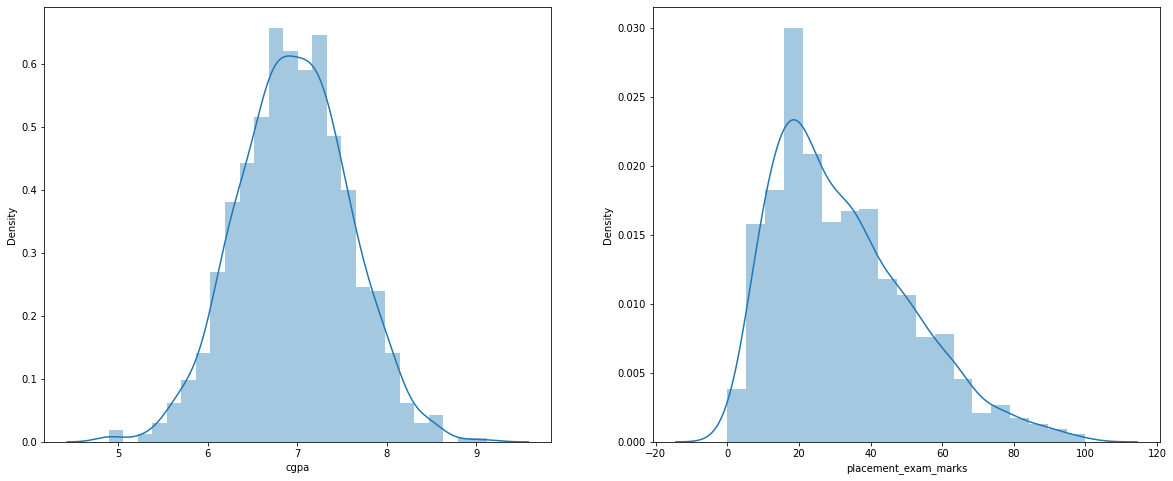

In [7]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [8]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [9]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [11]:
#boundary value
print("highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std()) 

highest allowed 8.808933625397168
lowest allowed 5.113546374602832


In [16]:
#oultier
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]


,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [ ]:
Trimming: Removes outliers completely from the dataset. This can be useful when outliers are errors or extreme anomalies,
          but may result in data loss.
Capping (Winsorizing): Limits the impact of outliers by capping their values to a specified threshold. This retains all
                       data points but reduces the influence of extreme values.
Both methods are useful for dealing with outliers, and the choice between them depends on the specific context and goals
of your analysis. Trimming is more aggressive, while capping is more conservative.

In [20]:
#lets do trimming 
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [22]:
#via zscore
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [23]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [24]:
df[df['cgpa_zscore'] > 3]


,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [25]:
df[df['cgpa_zscore'] < -3]


,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [26]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]


,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [27]:
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]


In [28]:
#trimming result
new_df


,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [29]:
#capping 
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [30]:
lower_limit

5.113546374602832

In [31]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [32]:
df.shape

(1000, 4)

In [33]:
df['cgpa'].describe()


count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64